In [1]:
#get my stuff

import pandas as pd
import os
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np
import scipy as sci
import scipy.stats as stats

In [2]:
#make paths to our data

comb_path = os.path.join("comb_Tcopy.csv")
raw_path = os.path.join("gps_Tcopy.csv")
review_path = os.path.join("gps_reviews_Tcopy.csv")

In [13]:
#make dataframes of the combined data Dave mixed for us

comb_df = pd.read_csv(comb_path, low_memory=False)
comb_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122657,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,"10,000,000+",Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,NaN,NaN,NaN,NaN
122658,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,"10,000,000+",Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,NaN,NaN,NaN,NaN
122659,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,"10,000,000+",Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Too much ads,Positive,0.200,0.200000
122660,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,"10,000,000+",Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Just allow time ...,Neutral,0.000,0.000000


In [4]:
#narrow down the dataset to just 'type' and 'sentiment' to examine the relationship between them

sentiment_df = comb_df.loc[:, ['App', 'Type', 'Sentiment']]
sentiment_df = sentiment_df.dropna()
sentiment_df

,App,Type,Sentiment
0,Coloring book moana,Free,Negative
1,Coloring book moana,Free,Negative
2,Coloring book moana,Free,Neutral
4,Coloring book moana,Free,Positive
5,Coloring book moana,Free,Negative
...,...,...,...
122646,A+ Gallery - Photos & Videos,Free,Positive
122652,A+ Gallery - Photos & Videos,Free,Positive
122659,A+ Gallery - Photos & Videos,Free,Positive
122660,A+ Gallery - Photos & Videos,Free,Neutral


In [14]:
#with this we could check by app how their sentiment scores rack up

app_sent_df = sentiment_df.copy()
app_sent_df = app_sent_df.groupby('App')['Sentiment'].value_counts()
app_sent_df

App                             Sentiment
10 Best Foods for You           Positive     324
                                Neutral       44
                                Negative      20
11st                            Positive      23
                                Neutral       10
                                            ... 
Hotwire Hotel & Car Rental App  Neutral       11
                                Negative       6
Housing-Real Estate & Property  Negative      10
                                Positive       8
                                Neutral        3
Name: Sentiment, Length: 2240, dtype: int64

In [8]:
#and this one tallies their sentiment scores by whether they're free or paid

type_sent_df = sentiment_df.copy()
type_sent_df = type_sent_df.groupby('Type')['Sentiment'].value_counts()

#type_sent_df.to_csv('Outputs/Type-Sentiment_table.csv', index=True)

type_sent_df

Type  Sentiment
Free  Positive     45569
      Negative     18020
      Neutral       8244
Paid  Positive       626
      Negative       114
      Neutral         42
Name: Sentiment, dtype: int64

In [9]:
#let's get the freebies alone

free_sent_df = sentiment_df.loc[sentiment_df['Type'] == 'Free']
free_sent_df = free_sent_df.groupby('Type')['Sentiment'].value_counts()

free_sent_df

Type  Sentiment
Free  Positive     45569
      Negative     18020
      Neutral       8244
Name: Sentiment, dtype: int64

In [10]:
#time for paid

paid_sent_df = sentiment_df.loc[sentiment_df['Type'] == 'Paid']
paid_sent_df = paid_sent_df.groupby('Type')['Sentiment'].value_counts()

paid_sent_df

Type  Sentiment
Paid  Positive     626
      Negative     114
      Neutral       42
Name: Sentiment, dtype: int64

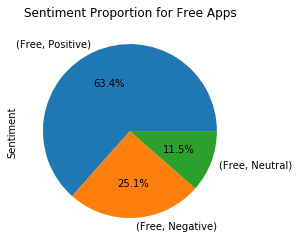

In [11]:
#put both of those into pie charts to show distribution of sentiments by type

free_sent_df.plot.pie(title='Sentiment Proportion for Free Apps', autopct='%1.1f%%')

#plt.savefig('Outputs/Free-Sentiment_piechart.png')

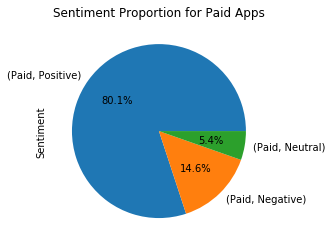

In [12]:
paid_sent_df.plot.pie(title='Sentiment Proportion for Paid Apps', autopct='%1.1f%%')

#plt.savefig('Outputs/Paid-Sentiment_piechart.png')